## EDA Part 2

---

In [43]:
# %pip install -U isbntools
# %pip install natsort

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import isbnlib 
import time
import isbntools
import os
import ast
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from unidecode import unidecode
from natsort import os_sorted
from isbntools.app import * 
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../data/train_cleaned.csv', index_col=0)

In [3]:
test = pd.read_csv('../data/test_cleaned.csv', index_col=0)

In [4]:
book_df = pd.read_csv('../data/full_book_list_cleaned.csv', index_col=0)

In [5]:
train['author'] = train['author'].fillna('')
test['author'] = test['author'].fillna('')
book_df['author'] = book_df['author'].fillna('')

In [7]:
train_titles = train['title'].tolist()
train_authors = train['author'].tolist()
test_titles = test['title'].tolist()
test_authors = test['author'].tolist()
book_titles = book_df['title'].tolist()
book_authors = book_df['author'].tolist()

In [8]:
train_titles_authors = [a + ' ' + b for a,b in zip(train_titles, train_authors)]
test_titles_authors = [a + ' ' + b for a,b in zip(test_titles, test_authors)]
book_titles_authors = [a + ' ' + b for a,b in zip(book_titles, book_authors)]

#### Getting ISBN for book titles so I can extract the publication date

In [8]:
# https://stackoverflow.com/questions/71569951/iterate-dataframe-and-assign-value-to-each-row-i-get-the-same-value-while-i-wan
# https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks/312464#312464

def get_isbn(titles):
    isbn_list = []
    list_segments = [titles[i:i + 10] for i in range(0, len(titles), 10)] 
    for i in tqdm(range(len(list_segments))):
        current_segment = list_segments[i]
        current_segment_isbn, current_segment_meta = [],[]
        for title in current_segment:
            try:
                current_isbn = isbn_from_words(title)
                current_meta = isbnlib.meta(current_isbn)
            except:
                current_isbn = 'did not work'
                current_meta = 'did not work'
            current_segment_isbn.append(current_isbn)
            current_segment_meta.append(current_meta)
        pd.DataFrame([current_segment,current_segment_isbn,current_segment_meta]).T.\
            to_csv(f'../output/output_10_full_books_cleaned/segment_{i}_results.csv')
        time.sleep(1)
    return 'Done!'

#### Trying a different function for getting ISBN data

In [17]:
def title_isbn(title):
    try:
        isbn = isbn_goom(title.lower())
    except:
        isbn = None
    return {'title': title, 'isbn': isbn}
    
import numpy as np
np.random.seed(42)
title_subset = np.random.choice(train_titles, size=10)

title_isbn_list = [title_isbn(title) for title in title_subset]
pd.DataFrame(title_isbn_list)

,title,isbn
0,Wedding Etiquette Hell: The Bride's Bible to A...,None
1,Theory of Interest,None
2,One Lucky Vampire: An Argeneau Novel (Argeneau...,None
3,The World of Robert Jordan's The Wheel of Time,None
4,A Touch of His Peace: Meditations on Experienc...,None
5,Readings on a Separate Peace (The Greenhaven P...,None
6,Discover! America's Great River Road: Volume I...,None
7,Who is Coming to Our House?,None
8,Minister in Training: A Minister's Journey,None
9,The Worried Child: Recognizing Anxiety in Chil...,None


In [8]:
list_segments = [train_titles[i:i + 300] for i in range(0, len(train_titles), 300)]

In [10]:
get_isbn(["The Sisters Brothers: A Novel", "Jailbird: A Novel"])

100%|██████████| 1/1 [00:03<00:00,  3.56s/it]


'Done!'

In [14]:
train_titles_authors[3]

'An Amish Gathering: Life in Lancaster County Beth Wiseman'

In [10]:
isbn_from_words("The Sisters Brothers: A Novel")

ISBNLibHTTPError: an HTTP error has ocurred ((302) The HTTP server returned a redirect error that would lead to an infinite loop.
The last 30x error message was:
Found)

In [10]:
isbnlib.meta('9781588345295')

{'ISBN-13': '9781588345295',
 'Title': 'With Schwarzkopf - Life Lessons Of The Bear',
 'Authors': ['Gus Lee'],
 'Publisher': 'Smithsonian Institution',
 'Year': '2015',
 'Language': 'en'}

In [9]:
len(train_titles)

11970

In [10]:
len(test_titles)

1330

In [18]:
len(book_titles)

43024

In [18]:
print((446*10) + (81*10) + (410*10) + 4000 + 900)

14270


In [ ]:
get_isbn(book_titles[13370:17370])

 27%|██▋       | 108/400 [44:49<3:45:42, 46.38s/it]

In [21]:
book_titles[14280:14290]

['The Sisters Brothers: A Novel',
 'Jailbird: A Novel',
 "The Headmaster's Darlings: A Mountain Brook Novel (Story River Books)",
 'Erasure: A Novel',
 'The Utterly Uninteresting and Unadventurous Tales of Fred, the Vampire Accountant',
 'The Adventures of Tom Sawyer',
 'Mermaids in Paradise: A Novel',
 'The Inlooker: Full Length',
 'Skipping Christmas: A Novel',
 'Amerika: The Missing Person: A New Translation, Based on the Restored Text (The Schocken Kafka Library)']

#### Reading in CSV files with meta data

In [9]:
train_1 = os.listdir('../output/output_1_train_cleaned/')
train_2 = os.listdir('../output/output_2_train_cleaned/')
train_3 = os.listdir('../output/output_3_train_cleaned/')
test_1 = os.listdir('../output/output_4_test_cleaned/')
full_list_1 = os.listdir('../output/output_5_full_books_cleaned/')
full_list_2 = os.listdir('../output/output_6_full_books_cleaned/')
full_list_3 = os.listdir('../output/output_7_full_books_cleaned/')
full_list_4 = os.listdir('../output/output_8_full_books_cleaned/')
full_list_5 = os.listdir('../output/output_9_full_books_cleaned/')

df_list = []
for i in os_sorted(train_1):  # os_sorted makes sure it's reading in the csv's in numerical order
    if i.endswith('.csv'): # ensuring we ignore the 'ipynb checkpoints' folder
        df_list.append(pd.read_csv('../output/output_1_train_cleaned/' + i, index_col=0))
df1 = pd.concat(df_list)

In [10]:
df_list = []
for i in os_sorted(train_2):
    if i.endswith('.csv'):
        df_list.append(pd.read_csv('../output/output_2_train_cleaned/' + i, index_col=0))
df2 = pd.concat(df_list)

In [11]:
df_list = []
for i in os_sorted(train_3):
    if i.endswith('.csv'):
        df_list.append(pd.read_csv('../output/output_3_train_cleaned/' + i, index_col=0))
df3 = pd.concat(df_list)

In [12]:
df_list = []
for i in os_sorted(test_1):
    if i.endswith('.csv'):
        df_list.append(pd.read_csv('../output/output_4_test_cleaned/' + i, index_col=0))
df_test = pd.concat(df_list)

In [13]:
df_list = []
for i in os_sorted(full_list_1):
    if i.endswith('.csv'):
        df_list.append(pd.read_csv('../output/output_5_full_books_cleaned/' + i, index_col=0))
df_full_1 = pd.concat(df_list)

In [14]:
df_list = []
for i in os_sorted(full_list_2):
    if i.endswith('.csv'):
        df_list.append(pd.read_csv('../output/output_6_full_books_cleaned/' + i, index_col=0))
df_full_2 = pd.concat(df_list)

In [15]:
df_list = []
for i in os_sorted(full_list_3):
    if i.endswith('.csv'):
        df_list.append(pd.read_csv('../output/output_7_full_books_cleaned/' + i, index_col=0))
df_full_3 = pd.concat(df_list)

In [16]:
df_list = []
for i in os_sorted(full_list_4):
    if i.endswith('.csv'):
        df_list.append(pd.read_csv('../output/output_8_full_books_cleaned/' + i, index_col=0))
df_full_4 = pd.concat(df_list)

In [17]:
df_list = []
for i in os_sorted(full_list_5):
    if i.endswith('.csv'):
        df_list.append(pd.read_csv('../output/output_9_full_books_cleaned/' + i, index_col=0))
df_full_5 = pd.concat(df_list)

In [65]:
book_df_2 = book_df.head(9380)

In [729]:
df_train = pd.concat([df1, df2, df3])

In [30]:
df_full = pd.concat([df_full_1, df_full_2, df_full_3])

In [730]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [15]:
df_full.reset_index(drop=True, inplace=True)

In [16]:
df_full.shape

(14290, 3)

In [731]:
df_train.shape, df_test.shape

((11970, 3), (1330, 3))

In [732]:
train.drop(columns='image_url', inplace=True)
test.drop(columns='image_url', inplace=True)

In [66]:
book_df_2.drop(columns='image_url', inplace=True)

In [733]:
train['meta'] = df_train['2'].values
test['meta'] = df_test['2'].values

In [67]:
book_df_2['meta'] = df_full['2'].values

In [734]:
train = train[train['meta']!= 'did not work']
train = train[train['meta']!='{}']

In [735]:
test = test[test['meta']!= 'did not work']
test = test[test['meta']!='{}']

In [68]:
book_df_2 = book_df_2[book_df_2['meta']!= 'did not work']
book_df_2 = book_df_2[book_df_2['meta']!='{}']

In [736]:
train.reset_index(drop=True, inplace=True)
train.to_csv('../data/train_2_cleaned.csv')

In [737]:
test.reset_index(drop=True, inplace=True)
test.to_csv('../data/test_2_cleaned.csv')

In [69]:
book_df_2.reset_index(drop=True, inplace=True)
book_df_2.to_csv('../data/book_df_2_cleaned.csv')

In [738]:
train['meta'] = train['meta'].apply(lambda x: json.dumps(ast.literal_eval(str(x))))
test['meta'] = test['meta'].apply(lambda x: json.dumps(ast.literal_eval(str(x))))

In [739]:
train.head()

,amazon_index,filename,title,author,category_id,category,meta
0,1588345297,1588345297.jpg,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs,"{""ISBN-13"": ""9781588345295"", ""Title"": ""With Sc..."
1,1404803335,1404803335.jpg,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books,"{""ISBN-13"": ""9781404803336"", ""Title"": ""Magnets..."
2,471310115,0471310115.jpg,"Janice VanCleave's 201 Awesome, Magical, Bizar...",Janice VanCleave,4,Children's Books,"{""ISBN-13"": ""9780471310112"", ""Title"": ""Janice ..."
3,758266065,0758266065.jpg,"Breaking News (Godmothers, Book 5) (The Godmot...",Fern Michaels,15,Literature & Fiction,"{""ISBN-13"": ""9780758266064"", ""Title"": ""Breakin..."
4,393925609,0393925609.jpg,Byron's Poetry and Prose (Norton Critical Edit...,George Gordon Byron,15,Literature & Fiction,"{""ISBN-13"": ""9780393925609"", ""Title"": ""Byron's..."


In [70]:
book_df_2.head()

,amazon_index,filename,title,author,category_id,category,meta
0,553418025,0553418025.jpg,The Martian,Andy Weir,17,"Mystery, Thriller & Suspense","{'ISBN-13': '9780553418026', 'Title': 'The Mar..."
1,385539436,0385539436.jpg,Rogue Lawyer,John Grisham,17,"Mystery, Thriller & Suspense","{'ISBN-13': '9780553393484', 'Title': 'Rogue L..."
2,1476783454,1476783454.jpg,The Survivor (A Mitch Rapp Novel),Vince Flynn,17,"Mystery, Thriller & Suspense","{'ISBN-13': '9781628997491', 'Title': 'The Sur..."
3,316349933,0316349933.jpg,Career of Evil (Cormoran Strike),Robert Galbraith,17,"Mystery, Thriller & Suspense","{'ISBN-13': '9780751571417', 'Title': 'Career ..."
4,1594633665,1594633665.jpg,The Girl on the Train,Paula Hawkins,17,"Mystery, Thriller & Suspense","{'ISBN-13': '9781594633669', 'Title': 'The Gir..."


#### Separating out the author and year from the 'meta' data

In [740]:
train_meta_col = [ast.literal_eval(i) for i in train['meta']]
train_meta_col[0]['Authors']

['Gus Lee']

In [741]:
year_list = []
author_list = []
for i in train_meta_col:
    year_list.append(i['Year'])
    author_list.append(i['Authors'])

In [742]:
train['year'] = year_list
train['meta_author'] = author_list

In [743]:
train.head(3)

,amazon_index,filename,title,author,category_id,category,meta,year,meta_author
0,1588345297,1588345297.jpg,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs,"{""ISBN-13"": ""9781588345295"", ""Title"": ""With Sc...",2015,[Gus Lee]
1,1404803335,1404803335.jpg,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books,"{""ISBN-13"": ""9781404803336"", ""Title"": ""Magnets...",2002,[Natalie M. Rosinsky]
2,471310115,0471310115.jpg,"Janice VanCleave's 201 Awesome, Magical, Bizar...",Janice VanCleave,4,Children's Books,"{""ISBN-13"": ""9780471310112"", ""Title"": ""Janice ...",1994,[Janice VanCleave]


In [744]:
test_meta_col = [ast.literal_eval(i) for i in test['meta']]
test_meta_col[0]['Authors']

['Robert Gottlieb']

In [745]:
year_2_list = []
author_2_list = []
for i in test_meta_col:
    year_2_list.append(i['Year'])
    author_2_list.append(i['Authors'])

In [746]:
test['year'] = year_2_list
test['meta_author'] = author_2_list

In [71]:
book_df_2_meta_col = [ast.literal_eval(i) for i in book_df_2['meta']]
book_df_2_meta_col[0]['Authors']

['Andy Weir']

In [72]:
year_3_list = []
author_3_list = []
for i in book_df_2_meta_col:
    year_3_list.append(i['Year'])
    author_3_list.append(i['Authors'])

In [73]:
book_df_2['year'] = year_3_list
book_df_2['meta_author'] = author_3_list

#### Stripping the square brackets from the author

In [747]:
# https://stackoverflow.com/questions/38147447/how-to-remove-square-bracket-from-pandas-dataframe

train['meta_author'] = train['meta_author'].str[0]
test['meta_author'] = test['meta_author'].str[0]

In [74]:
book_df_2['meta_author'] = book_df_2['meta_author'].str[0]

In [748]:
test['meta_author']

0         Robert Gottlieb
1            Ann Charters
2            Cynthia Lord
3             Tyler Omoth
4            Yvone Lenard
              ...        
1258         Stuart Woods
1259    Patricia M. Mahon
1260        Ann Hazelwood
1261        Michael Sears
1262      Agatha Christie
Name: meta_author, Length: 1263, dtype: object

In [749]:
train['meta_author']

0                                Gus Lee
1                    Natalie M. Rosinsky
2                       Janice VanCleave
3                          Fern Michaels
4        George Gordon Byron Baron Byron
                      ...               
11363                      John Sandford
11364                    Michael O'Byrne
11365                       Martin Clark
11366                            Pearson
11367                      Lucy Burdette
Name: meta_author, Length: 11368, dtype: object

In [75]:
book_df_2['meta_author']

0              Andy Weir
1           John Grisham
2            Vince Flynn
3       Kelley Armstrong
4          Paula Hawkins
              ...       
8770     Stephanie James
8771      Mallory Monroe
8772        Tonya Barber
8773    Tressie Lockwood
8774           Cher Etan
Name: meta_author, Length: 8775, dtype: object

#### Filtering out special characters for author comparison

In [750]:
train['meta_author'] = train['meta_author'].apply(unidecode)

In [751]:
test['meta_author'] = test['meta_author'].apply(unidecode)

In [76]:
book_df_2['meta_author'] = book_df_2['meta_author'].apply(unidecode)

##### Filtering out entries whose authors don't match the metadata (possibly the wrong ISBN and metadata)

In [752]:
train['equal'] = np.where(train['author'] != train['meta_author'], False, True)

In [753]:
test['equal'] = np.where(test['author'] != test['meta_author'], False, True)

In [77]:
book_df_2['equal'] = np.where(book_df_2['author'] != book_df_2['meta_author'], False, True)

In [754]:
train[train['equal']==False]

,amazon_index,filename,title,author,category_id,category,meta,year,meta_author,equal
4,393925609,0393925609.jpg,Byron's Poetry and Prose (Norton Critical Edit...,George Gordon Byron,15,Literature & Fiction,"{""ISBN-13"": ""9780393925609"", ""Title"": ""Byron's...",2010,George Gordon Byron Baron Byron,False
6,859531414,0859531414.jpg,Five Little Ducks (Classic Books With Holes),Annie Kubler,4,Children's Books,"{""ISBN-13"": ""9780859531245"", ""Title"": ""Five Li...",2002,,False
8,30683734,0030683734.jpg,Elements of Literature: Student Edition Grade ...,RINEHART AND WINSTON HOLT,4,Children's Books,"{""ISBN-13"": ""9780030424120"", ""Title"": ""Element...",2005,,False
16,1941450067,1941450067.jpg,Secret,Kindle Alexander,22,Romance,"{""ISBN-13"": ""9781582701707"", ""Title"": ""The Sec...",2006,Rhonda Byrne,False
25,1250069211,1250069211.jpg,Lost for Words: A Novel,Edward St. Aubyn,15,Literature & Fiction,"{""ISBN-13"": ""9781250124531"", ""Title"": ""The Los...",2018,Stephanie Butland,False
...,...,...,...,...,...,...,...,...,...,...
11327,345544048,0345544048.jpg,Speaking in Bones: A Novel (Temperance Brennan),Kathy Reichs,17,"Mystery, Thriller & Suspense","{""ISBN-13"": ""9780345544063"", ""Title"": ""Speakin...",,,False
11337,1617753815,1617753815.jpg,Buffalo Noir (Akashic Noir),,17,"Mystery, Thriller & Suspense","{""ISBN-13"": ""9781617753817"", ""Title"": ""Buffalo...",2015,Ed Park,False
11353,098544648X,098544648X.jpg,Cage Without Bars,Gerald Neufeld,17,"Mystery, Thriller & Suspense","{""ISBN-13"": ""9781772600698"", ""Title"": ""A Cage ...",2018,Anne Dublin,False
11360,595278612,0595278612.jpg,Stout Fellow: A Guide Through Nero Wolfe's World,Ron Owens,17,"Mystery, Thriller & Suspense","{""ISBN-13"": ""9780595657162"", ""Title"": ""Stout F...",2003,O. E. McBride,False


In [755]:
train = train[train['equal']==True]

In [756]:
test = test[test['equal']==True]

In [78]:
book_df_2 = book_df_2[book_df_2['equal']==True]

In [757]:
train.shape, test.shape

((8695, 10), (975, 10))

#### Filtering out blank year columns

In [758]:
train['year_empty'] = np.where(train['year'] == '', True, False)

In [759]:
test['year_empty'] = np.where(test['year'] == '', True, False)

In [79]:
book_df_2['year_empty'] = np.where(book_df_2['year'] == '', True, False)

In [760]:
train = train[train['year_empty']==False]

In [761]:
test = test[test['year_empty']==False]

In [80]:
book_df_2 = book_df_2[book_df_2['year_empty']==False]

In [762]:
train.drop(columns=['equal', 'year_empty'], inplace=True)

In [763]:
test.drop(columns=['equal', 'year_empty'], inplace=True)

In [81]:
book_df_2.drop(columns=['equal', 'year_empty'], inplace=True)

#### Converting 'year' entries to 'decade' entries for ease of classification

In [765]:
train['decade'] = train['year'].astype('int')//10 * 10

In [766]:
test['decade'] = test['year'].astype('int')//10 * 10

In [82]:
book_df_2['decade'] = book_df_2['year'].astype('int')//10 * 10

##### Filtering out many different decades

In [767]:
train['decade'].value_counts()

2010    5340
2000    2290
1990     749
1980     169
1970      51
2020      47
1960      18
1950      18
1940       4
1920       2
1910       1
1900       1
1930       1
Name: decade, dtype: int64

In [768]:
train = train[train['decade'] > 1970]

In [769]:
train['decade'].value_counts()

2010    5340
2000    2290
1990     749
1980     169
2020      47
Name: decade, dtype: int64

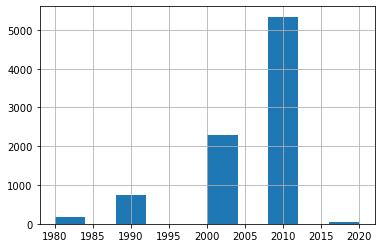

In [770]:
train['decade'].hist();

In [771]:
test['decade'].sort_values().value_counts()

2010    605
2000    264
1990     82
1980     14
1970      3
1960      2
2020      2
1940      1
1950      1
Name: decade, dtype: int64

In [777]:
test = test[test['decade'] > 1970]

In [773]:
test['decade'].value_counts()

2010    605
2000    264
1990     82
1980     14
2020      2
Name: decade, dtype: int64

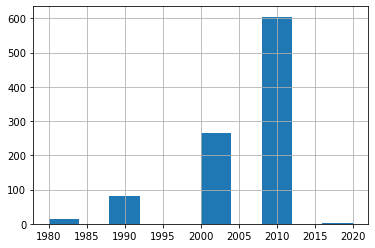

In [774]:
test['decade'].hist();

In [83]:
book_df_2['decade'].sort_values().value_counts()

2010    4837
2000    1241
1990     449
1980      81
2020      48
1970      35
1950       8
1960       7
1930       1
Name: decade, dtype: int64

In [775]:
train.to_csv('../data/train_2_cleaned.csv')

In [776]:
test.to_csv('../data/test_2_cleaned.csv')

##### Filtering out decades except for 2020, 1990, & 1980 to add more data to test/train for modeling

In [84]:
book_df_2 = book_df_2[book_df_2['decade'] != 2010]

In [85]:
book_df_2 = book_df_2[book_df_2['decade'] != 2000]

In [87]:
book_df_2 = book_df_2[book_df_2['decade'] > 1970]

In [88]:
book_df_2['decade'].value_counts()

1990    449
1980     81
2020     48
Name: decade, dtype: int64

In [93]:
train = pd.read_csv('../data/train_2_cleaned.csv', index_col=0)
test = pd.read_csv('../data/test_2_cleaned.csv', index_col=0)

In [125]:
book_df_2.reset_index(drop=True, inplace=True)

##### Concating all df's together to check if there are duplicate rows before adding to train/test

In [114]:
train['df'] = 'train'
test['df'] = 'test'
book_df_2['df'] = 'book_df'

In [116]:
book_train = pd.concat([book_df_2, train, test])

In [128]:
book_train.drop(columns='index', inplace=True)

In [132]:
book_train['dup']= book_train.duplicated()

In [138]:
book_train[book_train['dup']=='True']

,amazon_index,filename,title,author,category_id,category,meta,year,meta_author,decade,df,dup


> There are no duplicated rows

##### Splitting all extra df's into 90/10 split to add to train and test, respectively

In [141]:
book_df_2_1980 = book_df_2[book_df_2['decade']==1980]
book_df_2_1990 = book_df_2[book_df_2['decade']==1990]
book_df_2_2020 = book_df_2[book_df_2['decade']==2020]

In [143]:
book_df_2_1980.drop(columns=['level_0', 'index'], inplace=True)
book_df_2_1990.drop(columns=['level_0', 'index'], inplace=True)
book_df_2_2020.drop(columns=['level_0', 'index'], inplace=True)

In [164]:
a, b = np.split(book_df_2_1980, [int(.1*len(book_df_2_1980))])
c, d = np.split(book_df_2_1990, [int(.1*len(book_df_2_1990))])
e, f = np.split(book_df_2_2020, [int(.1*len(book_df_2_2020))])

In [167]:
print(len(a), len(b))
print(len(c), len(d))
print(len(e), len(f))

8 73
44 405
4 44


In [168]:
train = pd.concat([train, b, d, f])
test = pd.concat([test, a, c, e])

In [170]:
train.drop(columns='df', inplace=True)
test.drop(columns='df', inplace=True)

In [171]:
train['decade'].value_counts()

2010    5340
2000    2290
1990    1154
1980     242
2020      91
Name: decade, dtype: int64

In [172]:
test['decade'].value_counts()

2010    605
2000    264
1990    126
1980     22
2020      6
Name: decade, dtype: int64

In [176]:
train.to_csv('../data/train_2_cleaned.csv')

In [177]:
test.to_csv('../data/test_2_cleaned.csv')

In [105]:
train = pd.read_csv('../data/train_2_cleaned.csv', index_col=0)
test = pd.read_csv('../data/test_2_cleaned.csv', index_col=0)

In [11]:
train_imgs = train.tail(522)['filename'].tolist()

In [10]:
test_imgs = test.tail(56)['filename'].tolist()

In [17]:
train.tail(522)['category'].value_counts()

Science Fiction & Fantasy       335
Romance                         111
Mystery, Thriller & Suspense     76
Name: category, dtype: int64

In [18]:
test.tail(56)['category'].value_counts()

Mystery, Thriller & Suspense    56
Name: category, dtype: int64

#### Binarizing the Decades

In [39]:
train[train['decade'] <= 2000]['decade'].value_counts()

2000    2290
1990    1154
1980     242
Name: decade, dtype: int64

In [44]:
train['post_2010'] = np.where(train['decade'] > 2000, 'post_2010', 'pre_2010')

In [45]:
test['post_2010'] = np.where(test['decade'] > 2000, 'post_2010', 'pre_2010')

In [47]:
train[train['post_2010'] == 'post_2010']['decade'].value_counts()

2010    5340
2020      91
Name: decade, dtype: int64

In [48]:
test[test['post_2010'] == 'post_2010']['decade'].value_counts()

2010    605
2020      6
Name: decade, dtype: int64

In [50]:
test[test['post_2010'] == 'pre_2010']['decade'].value_counts()

2000    264
1990    126
1980     22
Name: decade, dtype: int64

In [51]:
train.to_csv('../data/train_2_cleaned.csv')
test.to_csv('../data/test_2_cleaned.csv')

### Visualizing Images for Different Genres

In [4]:
train_genre = pd.read_csv('../data/train_genre_cleaned.csv', index_col=0)
test_genre = pd.read_csv('../data/test_genre_cleaned.csv', index_col=0)

In [63]:
train_genre.head()

,amazon_index,filename,image_url,title,author,category_id,category
0,1588345297,1588345297.jpg,http://ecx.images-amazon.com/images/I/51l6XIoa...,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs
18,758266065,0758266065.jpg,http://ecx.images-amazon.com/images/I/51wuInBb...,"Breaking News (Godmothers, Book 5) (The Godmot...",Fern Michaels,15,Literature & Fiction
23,393925609,0393925609.jpg,http://ecx.images-amazon.com/images/I/41Owekbp...,Byron's Poetry and Prose (Norton Critical Edit...,George Gordon Byron,15,Literature & Fiction
42,520271181,0520271181.jpg,http://ecx.images-amazon.com/images/I/51s8awrm...,Becoming Dr. Q: My Journey from Migrant Farm W...,Alfredo Quinones-Hinojosa,1,Biographies & Memoirs
67,1457532506,1457532506.jpg,http://ecx.images-amazon.com/images/I/41ZHnHoF...,The Black Wall of Silence: A Novel,Paul Morrissey,15,Literature & Fiction


In [5]:
datagen = ImageDataGenerator(rescale=1/255)

train_gen = datagen.flow_from_dataframe(
    dataframe=train_genre,
    directory='../images/224x224/',
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(224,224)
)

Found 8550 validated image filenames belonging to 5 classes.


In [96]:
# https://www.pythonfixing.com/2021/11/fixed-display-image-and-its-label-from.html

class_names = train_gen.class_indices

new_dict={}
for key, value in class_names.items():
    new_dict[value]=key

In [56]:
new_dict

{0: 'Biographies & Memoirs',
 1: 'Literature & Fiction',
 2: 'Mystery, Thriller & Suspense',
 3: 'Science Fiction & Fantasy',
 4: 'Teen & Young Adult'}

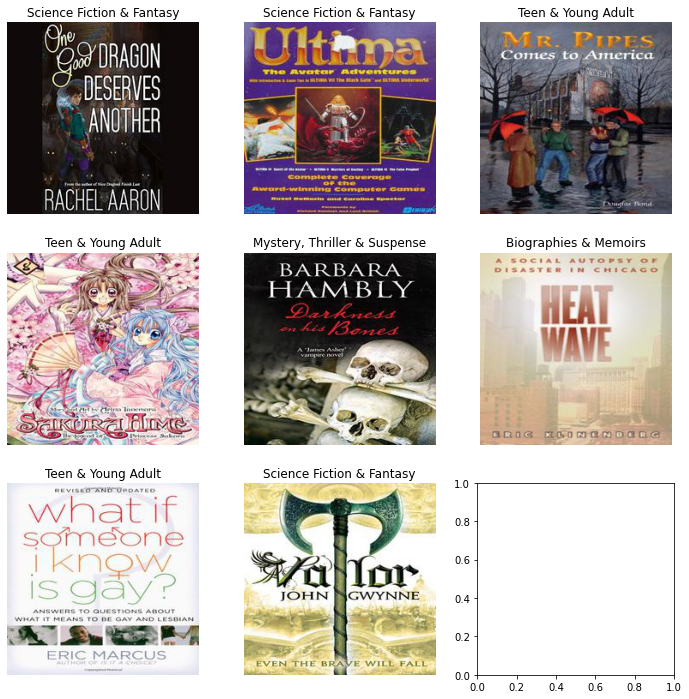

In [137]:
# https://keras.io/examples/vision/image_classification_from_scratch/

images, labels = train_gen.next()
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(3, 3, figsize=(12,12))
axs = [ax0, ax1, ax2, ax3, ax4, ax4, ax5, ax6, ax7, ax8]
for i in range(9):
    label_name = new_dict[labels[i].nonzero()[0][0]]
    axs[i].imshow(images[i])
    axs[i].set_title(label_name)
    axs[i].axis('off')

### Visualizing Images for Different Decades

In [106]:
train['decade'] = train['decade'].astype('str')

In [108]:
datagen = ImageDataGenerator(rescale=1/255)

train_gen_dec = datagen.flow_from_dataframe(
    dataframe=train,
    directory='../images/224x224/',
    x_col='filename',
    y_col='decade',
    class_mode='categorical',
    target_size=(224,224)
)

Found 9117 validated image filenames belonging to 5 classes.


In [109]:
# https://www.pythonfixing.com/2021/11/fixed-display-image-and-its-label-from.html

class_names = train_gen_dec.class_indices

new_dict_2={}
for key, value in class_names.items():
    new_dict_2[value]=key

In [112]:
new_dict_2

{0: '1980', 1: '1990', 2: '2000', 3: '2010', 4: '2020'}

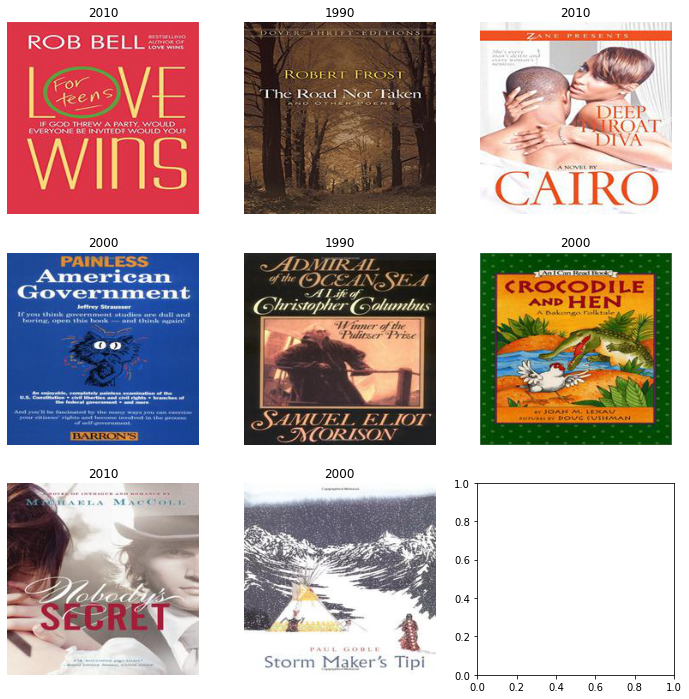

In [133]:
# https://keras.io/examples/vision/image_classification_from_scratch/

images, labels = train_gen_dec.next()
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(3, 3, figsize=(12,12))
axs = [ax0, ax1, ax2, ax3, ax4, ax4, ax5, ax6, ax7, ax8]
for i in range(9):
    label_name = new_dict_2[labels[i].nonzero()[0][0]]
    axs[i].imshow(images[i])
    axs[i].set_title(label_name)
    axs[i].axis('off')
   